# 전국 스타벅스 매장 현황 Selenium
## 황 성 윤

### 스타벅스(Starbucks)

- 참조사이트 1 : http://blog.naver.com/PostView.nhn?blogId=pjt3591oo&logNo=221189236488&parentCategoryNo=&categoryNo=116&viewDate=&isShowPopularPosts=true&from=search
- 참조사이트 2 : https://brunch.co.kr/@jk-lab/18
- 필요한 정보를 crawling 하는 것이 생각보다 어려워서 일단 위의 사이트를 참조해서 crawling을 실시하였음.
- 관리자 권한 cmd에 다음 명령어 입력 : pip install selenium

In [3]:
import bs4
import requests as rq

stbuck = rq.get('https://www.istarbucks.co.kr/store/store_map.do')
st_bs = bs4.BeautifulSoup(stbuck.text, 'lxml')
st_bs.find_all('li', class_='quickResultLstCon')

[]

In [1]:
from selenium import webdriver

# 설치된 크롬 버전에 맞는 ChromeDriver 설치 후 진행
# https://sites.google.com/a/chromium.org/chromedriver/home
chromedriver_dir = r'C:\Users\709-000\ChromeWebDriver\chromedriver.exe'
driver = webdriver.Chrome(chromedriver_dir)

In [24]:
# 홈페이지 접속
driver.get('https://www.istarbucks.co.kr/store/store_map.do')
time.sleep(5)

In [7]:
# 지역검색 버튼 클릭
loca = driver.find_element_by_class_name('loca_search')
loca.click()
time.sleep(5)

In [10]:
# 서울 버튼 클릭
sido = driver.find_element_by_class_name('sido_arae_box')
li = sido.find_elements_by_tag_name('li')
li[0].click()
time.sleep(5)

In [11]:
# 전체 버튼 클릭
gugun = driver.find_element_by_class_name('gugun_arae_box')
guli = gugun.find_element_by_tag_name('li')
guli.click()
time.sleep(5)

In [12]:
# 정보 가져오기
import bs4
source = driver.page_source
bs = bs4.BeautifulSoup(source, 'lxml')
entire = bs.find('ul', class_='quickSearchResultBoxSidoGugun')
li_list = entire.find_all('li')
for infor in li_list:
    print(infor.find('p').text)

서울특별시 강남구 언주로 425 (역삼동)02-568-3762
서울특별시 강남구 강남대로 538 (논현동)02-3442-3672
서울특별시 강남구 테헤란로 125 (역삼동)02-568-3668
서울특별시 강남구 남부순환로 2947 (대치동)02-568-3704
서울특별시 강남구 테헤란로 518 (대치동)02-568-3648
서울특별시 강남구 언주로 861 (신사동)02-541-3622
서울특별시 강남구 광평로 281 (수서동)02-6181-3688
서울특별시 강남구 남부순환로 2621 (도곡동)02-571-3604
서울특별시 강남구 테헤란로 409 (삼성동)02-2051-3562
서울특별시 강남구 봉은사로 446 (삼성동)02-539-3564
서울특별시 강남구 봉은사로2길 39 (역삼동)02-557-3484
서울특별시 강남구 영동대로 513 (삼성동)02-6002-3467
서울특별시 강남구 학동로 419 (청담동)02-514-3397
서울특별시 강남구 도곡로 205 (역삼동)02-565-3496
서울특별시 강남구 강남대로 390 (역삼동)02-561-3478
서울특별시 강남구 도곡로 457 (대치동)02-554-3315
서울특별시 강남구 영동대로 720 (청담동)02-3443-3371
서울특별시 강남구 압구정로30길 17 (신사동)02-541-3306
서울특별시 강남구 압구정로12길 32 (신사동)02-3446-3356
서울특별시 강남구 도산대로57길 24 (청담동)02-514-3364
서울특별시 강남구 강남대로 328 (역삼동)02-565-3347
서울특별시 강남구 도산대로 328 (논현동) HS빌딩02-758-8971
서울특별시 강남구 삼성로 402 (대치동)02-561-3287
서울특별시 강남구 테헤란로 505 (삼성동) 화진빌딩02-554-3235
서울특별시 강남구 논현로 752 (논현동,구산빌딩)02-758-8896
서울특별시 강남구 도산대로 108 (논현동) 렉스타워02-758-8848
서울특별시 강남구 남부순환로 2909 (대치동)02-758-88

In [31]:
# 전국 스타벅스 매장 주소 조사
import time
    
starbucks_address = []

# 정보 가져오기 (서울 ~ 제주)
for i in range(16): 
    chromedriver_dir = r'C:\Users\709-000\ChromeWebDriver\chromedriver.exe'
    driver = webdriver.Chrome(chromedriver_dir)
    driver.maximize_window()
    
    # 홈페이지 접속
    driver.get('https://www.istarbucks.co.kr/store/store_map.do')
    time.sleep(5)
    
    # 지역검색 버튼 클릭
    loca = driver.find_element_by_class_name('loca_search')
    loca.click()
    time.sleep(5)
    
    # 시/도 버튼 클릭
    sido = driver.find_element_by_class_name('sido_arae_box')
    li = sido.find_elements_by_tag_name('li')
    li[i].click()
    time.sleep(5)
    
    # 전체 버튼 클릭
    gugun = driver.find_element_by_class_name('gugun_arae_box')
    guli = gugun.find_element_by_tag_name('li')
    guli.click()
    time.sleep(5)
    
    # 정보 가져오기
    source = driver.page_source
    bs = bs4.BeautifulSoup(source, 'lxml')
    entire = bs.find('ul', class_='quickSearchResultBoxSidoGugun')
    li_list = entire.find_all('li')
    for infor in li_list:
        starbucks_address.append(infor.find('p').text)

# 정보 가져오기 (세종)
chromedriver_dir = r'C:\Users\709-000\ChromeWebDriver\chromedriver.exe'
driver = webdriver.Chrome(chromedriver_dir)

# 홈페이지 접속
driver.get('https://www.istarbucks.co.kr/store/store_map.do')
time.sleep(5)

# 지역검색 버튼 클릭
loca = driver.find_element_by_class_name('loca_search')
loca.click()
time.sleep(5)

# 시/도 버튼 클릭
sido = driver.find_element_by_class_name('sido_arae_box')
li = sido.find_elements_by_tag_name('li')
li[16].click()
time.sleep(5)   

# 정보 가져오기
source = driver.page_source
bs = bs4.BeautifulSoup(source, 'lxml')
entire = bs.find('ul', class_='quickSearchResultBoxSidoGugun')
li_list = entire.find_all('li')
for infor in li_list:
    starbucks_address.append(infor.find('p').text)

In [32]:
starbucks_address

['서울특별시 강남구 언주로 425 (역삼동)02-568-3762',
 '서울특별시 강남구 강남대로 538 (논현동)02-3442-3672',
 '서울특별시 강남구 테헤란로 125 (역삼동)02-568-3668',
 '서울특별시 강남구 남부순환로 2947 (대치동)02-568-3704',
 '서울특별시 강남구 테헤란로 518 (대치동)02-568-3648',
 '서울특별시 강남구 언주로 861 (신사동)02-541-3622',
 '서울특별시 강남구 광평로 281 (수서동)02-6181-3688',
 '서울특별시 강남구 남부순환로 2621 (도곡동)02-571-3604',
 '서울특별시 강남구 테헤란로 409 (삼성동)02-2051-3562',
 '서울특별시 강남구 봉은사로 446 (삼성동)02-539-3564',
 '서울특별시 강남구 봉은사로2길 39 (역삼동)02-557-3484',
 '서울특별시 강남구 영동대로 513 (삼성동)02-6002-3467',
 '서울특별시 강남구 학동로 419 (청담동)02-514-3397',
 '서울특별시 강남구 도곡로 205 (역삼동)02-565-3496',
 '서울특별시 강남구 강남대로 390 (역삼동)02-561-3478',
 '서울특별시 강남구 도곡로 457 (대치동)02-554-3315',
 '서울특별시 강남구 영동대로 720 (청담동)02-3443-3371',
 '서울특별시 강남구 압구정로30길 17 (신사동)02-541-3306',
 '서울특별시 강남구 압구정로12길 32 (신사동)02-3446-3356',
 '서울특별시 강남구 도산대로57길 24 (청담동)02-514-3364',
 '서울특별시 강남구 강남대로 328 (역삼동)02-565-3347',
 '서울특별시 강남구 도산대로 328 (논현동) HS빌딩02-758-8971',
 '서울특별시 강남구 삼성로 402 (대치동)02-561-3287',
 '서울특별시 강남구 테헤란로 505 (삼성동) 화진빌딩02-554-3235',
 '서울특별시 강남구 논현로 752 

In [33]:
import pandas as pd
import numpy as np

starbucks = pd.DataFrame({'주소' : starbucks_address})
starbucks['스타벅스입점'] = 1

In [34]:
starbucks.to_csv('data/starbucks.csv', encoding='EUC-KR', sep=',')

In [45]:
# 데이터 처리 후 다시 올리기
starbucks = pd.read_csv("data/starbucks.csv", encoding='EUC-KR', sep=',')
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 2 columns):
주소        1308 non-null object
스타벅스입점    1308 non-null int64
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [46]:
len(starbucks['주소'])

1308

In [47]:
starbucks['주소'][0].split(' ')

['서울특별시', '강남구', '언주로', '425', '(역삼동)02-568-3762']

In [48]:
city1 = [] # 광역시도
city2 = [] # 시도

for i in range(len(starbucks['주소'])):
    addr = starbucks['주소'][i].split(' ')
    city1.append(addr[0])
    city2.append(addr[1])
    
len(city1), len(city2)  

(1308, 1308)

In [49]:
starbucks['광역시도'] = city1
starbucks['시도'] = city2
starbucks.to_csv("data/starbucks.csv", encoding='EUC-KR', sep=',')
starbucks.head()

,주소,스타벅스입점,광역시도,시도
0,서울특별시 강남구 언주로 425 (역삼동)02-568-3762,1,서울특별시,강남구
1,서울특별시 강남구 강남대로 538 (논현동)02-3442-3672,1,서울특별시,강남구
2,서울특별시 강남구 테헤란로 125 (역삼동)02-568-3668,1,서울특별시,강남구
3,서울특별시 강남구 남부순환로 2947 (대치동)02-568-3704,1,서울특별시,강남구
4,서울특별시 강남구 테헤란로 518 (대치동)02-568-3648,1,서울특별시,강남구


In [81]:
# 피벗테이블
starbucks_enter = pd.pivot_table(starbucks, index = ['광역시도', '시도'],
                      values = ['스타벅스입점'], aggfunc = 'sum')

In [82]:
starbucks_enter.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 143 entries, (강원도, 강릉시) to (충청북도, 충주시)
Data columns (total 1 columns):
스타벅스입점    143 non-null int64
dtypes: int64(1)
memory usage: 2.6+ KB


In [83]:
starbucks_enter.reset_index(inplace=True) 
starbucks_enter.head()

,광역시도,시도,스타벅스입점
0,강원도,강릉시,3
1,강원도,고성군,1
2,강원도,동해시,1
3,강원도,속초시,3
4,강원도,원주시,6


In [59]:
starbucks_enter.to_csv("data/starbucks_enter.csv", encoding='EUC-KR', sep=',')

In [60]:
starbucks_enter['시도'].unique()

array(['강릉시', '고성군', '동해시', '속초시', '원주시', '춘천시', '홍천군', '고양시', '과천시',
       '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시', '동두천시', '부천시', '성남시',
       '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시', '양평군', '여주시', '오산시',
       '용인시', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시', '화성시',
       '거제시', '김해시', '사천시', '양산시', '진주시', '창원시', '통영시', '경산시', '경주시',
       '구미시', '김천시', '문경시', '안동시', '포항시', '광산구', '남구', '동구', '북구', '서구',
       '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구', '기장군',
       '동래구', '부산진구', '사상구', '사하구', '수영구', '연제구', '해운대구', '강남구', '강동구',
       '강북구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구',
       '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구',
       '은평구', '종로구', '중랑구', '세종시', '울주군', '계양구', '남동구', '미추홀구', '부평구',
       '연수구', '광양시', '나주시', '목포시', '무안군', '순천시', '여수시', '군산시', '익산시',
       '전주시', '정읍시', '서귀포시', '제주시', '계룡시', '공주시', '논산시', '당진시', '서산시',
       '아산시', '천안시', '제천시', '청주시', '충주시'], dtype=object)

In [84]:
si_name = [None] * len(starbucks_enter)

tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'], 
                       '성남':['수정구', '중원구', '분당구'], 
                       '안양':['만안구', '동안구'], 
                       '안산':['상록구', '단원구'], 
                       '고양':['덕양구', '일산동구', '일산서구'], 
                       '용인':['처인구', '기흥구', '수지구'], 
                       '청주':['상당구', '서원구', '흥덕구', '청원구'], 
                       '천안':['동남구', '서북구'], 
                       '전주':['완산구', '덕진구'], 
                       '포항':['남구', '북구'], 
                       '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'], 
                       '부천':['오정구', '원미구', '소사구']}

In [85]:
for n in starbucks_enter.index:
    if starbucks_enter['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        if starbucks_enter['시도'][n][:-1]=='고성' and starbucks_enter['광역시도'][n]=='강원도':
            si_name[n] = '고성(강원)'
        elif starbucks_enter['시도'][n][:-1]=='고성' and starbucks_enter['광역시도'][n]=='경상남도':
            si_name[n] = '고성(경남)'
        else:
             si_name[n] = starbucks_enter['시도'][n][:-1]
                
        for keys, values in tmp_gu_dict.items():
            if starbucks_enter['시도'][n] in values:
                if len(starbucks_enter['시도'][n])==2:
                    si_name[n] = keys + ' ' + starbucks_enter['시도'][n]
                elif starbucks_enter['시도'][n] in ['마산합포구','마산회원구']:
                    si_name[n] = keys + ' ' + starbucks_enter['시도'][n][2:-1]
                else:
                    si_name[n] = keys + ' ' + starbucks_enter['시도'][n][:-1]
        
    elif starbucks_enter['광역시도'][n] == '세종특별자치시':
        si_name[n] = '세종'
        
    else:
        if len(starbucks_enter['시도'][n])==2:
            si_name[n] = starbucks_enter['광역시도'][n][:2] + ' ' + starbucks_enter['시도'][n]
        else:
            si_name[n] = starbucks_enter['광역시도'][n][:2] + ' ' + starbucks_enter['시도'][n][:-1]

In [86]:
starbucks_enter['ID'] = si_name
starbucks_enter.head()

,광역시도,시도,스타벅스입점,ID
0,강원도,강릉시,3,강릉
1,강원도,고성군,1,고성(강원)
2,강원도,동해시,1,동해
3,강원도,속초시,3,속초
4,강원도,원주시,6,원주


In [64]:
starbucks_enter.to_csv("data/starbucks_enter.csv", encoding='EUC-KR', sep=',')

In [87]:
draw_korea_raw = pd.read_excel('data/05. draw_korea_raw.xlsx', 
                               encoding="EUC-KR")
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack()) 
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, 
                              inplace=True)
draw_korea = draw_korea_raw_stacked
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

In [67]:
set(draw_korea['ID'].unique()) - set(starbucks_enter['ID'].unique())

{'가평',
 '강진',
 '거창',
 '고령',
 '고성(경남)',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '고창',
 '고흥',
 '곡성',
 '괴산',
 '구례',
 '군위',
 '금산',
 '김제',
 '남원',
 '남해',
 '단양',
 '담양',
 '대구 남구',
 '무주',
 '밀양',
 '보령',
 '보성',
 '보은',
 '봉화',
 '부산 영도',
 '부안',
 '부여',
 '부천 소사',
 '부천 오정',
 '부천 원미',
 '산청',
 '삼척',
 '상주',
 '서천',
 '성남 분당',
 '성남 수정',
 '성남 중원',
 '성주',
 '수원 권선',
 '수원 영통',
 '수원 장안',
 '수원 팔달',
 '순창',
 '신안',
 '안산 단원',
 '안산 상록',
 '안양 동안',
 '안양 만안',
 '양구',
 '양양',
 '연천',
 '영광',
 '영덕',
 '영동',
 '영암',
 '영양',
 '영월',
 '영주',
 '영천',
 '예산',
 '예천',
 '옥천',
 '완도',
 '완주',
 '용인 기흥',
 '용인 수지',
 '용인 처인',
 '울릉',
 '울진',
 '음성',
 '의령',
 '의성',
 '인제',
 '인천 강화',
 '인천 남구',
 '인천 옹진',
 '임실',
 '장성',
 '장수',
 '장흥',
 '전주 덕진',
 '전주 완산',
 '정선',
 '증평',
 '진도',
 '진안',
 '진천',
 '창녕',
 '창원 성산',
 '창원 의창',
 '창원 진해',
 '창원 합포',
 '창원 회원',
 '천안 동남',
 '천안 서북',
 '철원',
 '청도',
 '청송',
 '청양',
 '청주 상당',
 '청주 서원',
 '청주 청원',
 '청주 흥덕',
 '칠곡',
 '태백',
 '태안',
 '평창',
 '포항 남구',
 '포항 북구',
 '하동',
 '함안',
 '함양',
 '함평',
 '합천',
 '해남',
 '홍성',
 '화순',
 '화천',
 '횡성'}

In [69]:
set(starbucks_enter['ID'].unique()) - set(draw_korea['ID'].unique())

{'고양',
 '부천',
 '성남',
 '수원',
 '안산',
 '안양',
 '용인',
 '인천 미추홀',
 '전주',
 '창원',
 '천안',
 '청주',
 '포항'}

In [88]:
starbucks_enter = pd.merge(starbucks_enter, draw_korea, how='right', on=['ID'])
starbucks_enter = starbucks_enter.fillna(0)
starbucks_enter.to_csv("data/starbucks_enter.csv", encoding='EUC-KR', sep=',')
starbucks_enter.head()

,광역시도,시도,스타벅스입점,ID,y,x
0,강원도,강릉시,3.0,강릉,3,11
1,강원도,고성군,1.0,고성(강원),0,10
2,강원도,동해시,1.0,동해,4,11
3,강원도,속초시,3.0,속초,1,10
4,강원도,원주시,6.0,원주,5,10


In [89]:
mapdata = starbucks_enter.pivot_table(index='y', columns='x', values='스타벅스입점')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
mapdata

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,4.0,2.0,0.0,2.0,10.0,0.0,5.0,3.0,NaN,NaN,NaN
2,NaN,NaN,NaN,0.0,0.0,2.0,12.0,7.0,3.0,0.0,0.0,NaN,NaN,NaN
3,NaN,NaN,5.0,0.0,8.0,5.0,11.0,0.0,3.0,9.0,0.0,3.0,NaN,NaN
4,NaN,NaN,0.0,0.0,8.0,21.0,38.0,8.0,6.0,1.0,0.0,1.0,NaN,NaN
5,NaN,0.0,0.0,0.0,8.0,32.0,50.0,9.0,13.0,3.0,6.0,0.0,NaN,NaN
6,NaN,6.0,0.0,5.0,14.0,8.0,17.0,14.0,29.0,5.0,0.0,0.0,NaN,NaN
7,NaN,1.0,2.0,0.0,14.0,10.0,45.0,0.0,3.0,2.0,0.0,0.0,NaN,NaN
8,NaN,NaN,9.0,0.0,35.0,10.0,76.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0


In [90]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

# 그림 그리는 함수
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계를 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

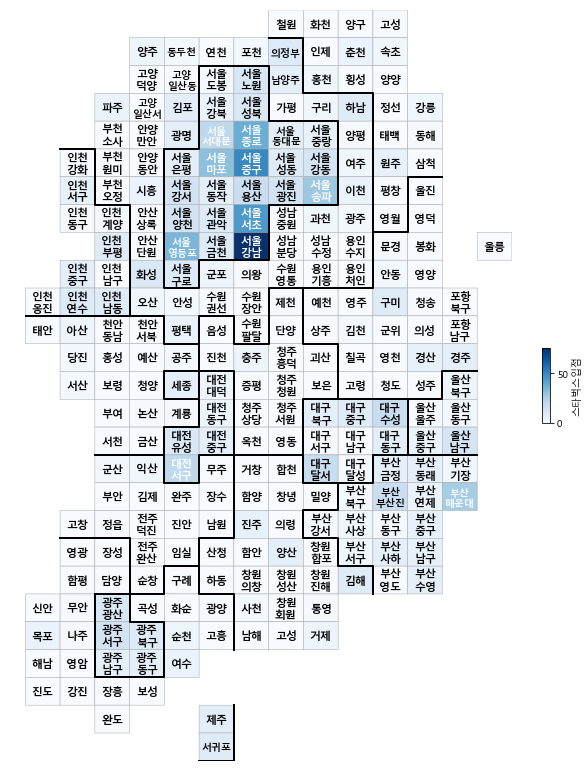

In [91]:
drawKorea('스타벅스입점', starbucks_enter, 'Blues')